# Airline recommendation system

loading and cleaning recommendation data

In [1]:
import pandas as pd

flights= "Clean_Dataset.csv"  
df = pd.read_csv(flights)

In [2]:
print(f"Shape of dataset: {df.shape}")    

Shape of dataset: (300153, 12)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df = df.drop(columns=['Unnamed: 0'])
print("the unnamed column was dropped successfully")


the unnamed column was dropped successfully


In [5]:
print(df.columns)

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in dataset: {duplicates}")

Number of duplicate rows in dataset: 0


In [7]:
print(df.head())    

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

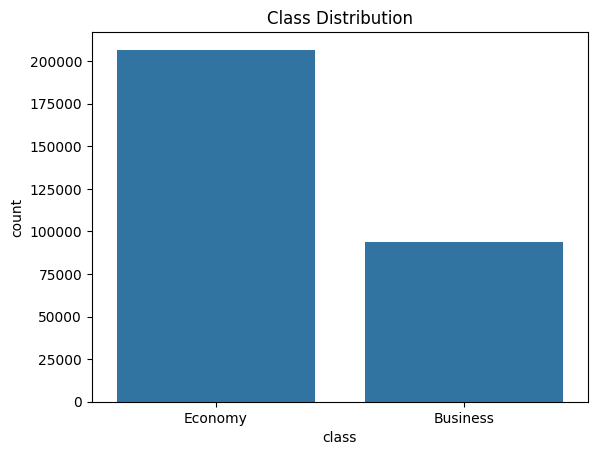

In [9]:
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.show()

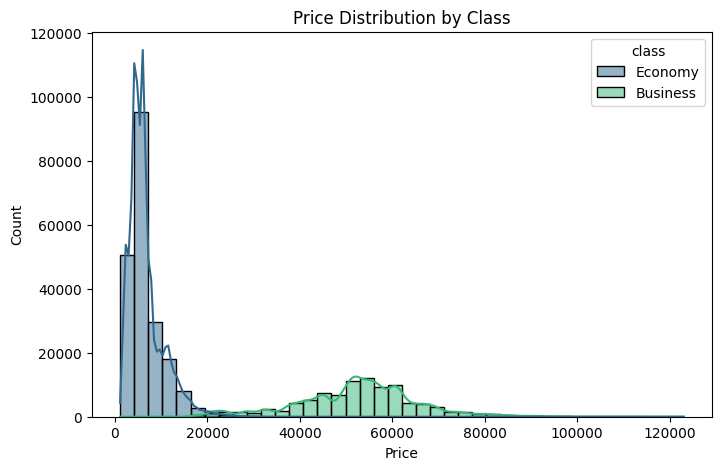

In [10]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df, x="price", hue="class", kde=True, bins=40, palette="viridis")

plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution by Class")

plt.show()


C:\Users\anusiya\AppData\Local\Temp\ipykernel_10080\1379806677.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_df, x='route', y='price', hue='airline', ci=None)


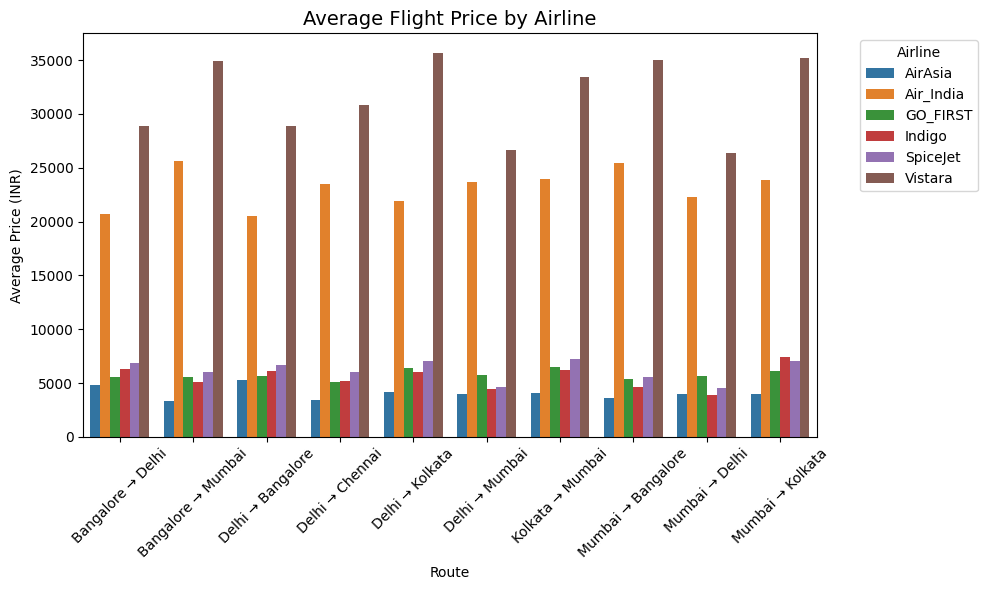

In [11]:
df['route'] = df['source_city'] + " → " + df['destination_city']

avg_price = df.groupby(['airline', 'route'])['price'].mean().reset_index()

top_routes = df['route'].value_counts().head(10).index
top_df = avg_price[avg_price['route'].isin(top_routes)]

plt.figure(figsize=(10,6))
sns.barplot(data=top_df, x='route', y='price', hue='airline', ci=None)
plt.title('Average Flight Price by Airline', fontsize=14)
plt.xlabel('Route')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\anusiya\AppData\Local\Temp\ipykernel_10080\1074952647.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_df, x='route', y='duration', hue='airline', ci=None, palette='magma')


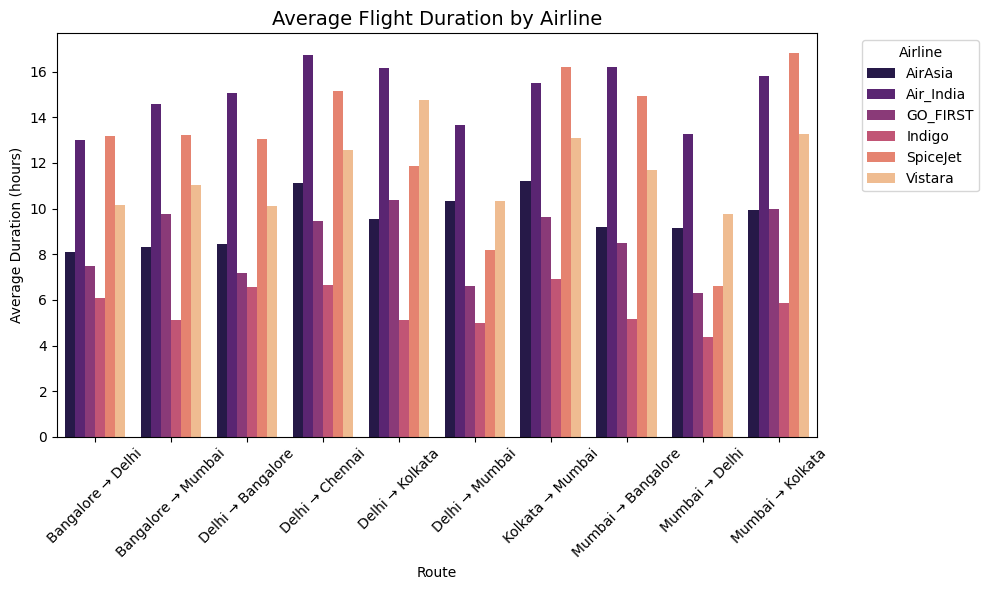

In [12]:
df['route'] = df['source_city'] + " → " + df['destination_city']

avg_duration = df.groupby(['airline', 'route'])['duration'].mean().reset_index()

top_routes = df['route'].value_counts().head(10).index
top_df = avg_duration[avg_duration['route'].isin(top_routes)]

plt.figure(figsize=(10,6))
sns.barplot(data=top_df, x='route', y='duration', hue='airline', ci=None, palette='magma')
plt.title('Average Flight Duration by Airline', fontsize=14)
plt.xlabel('Route')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



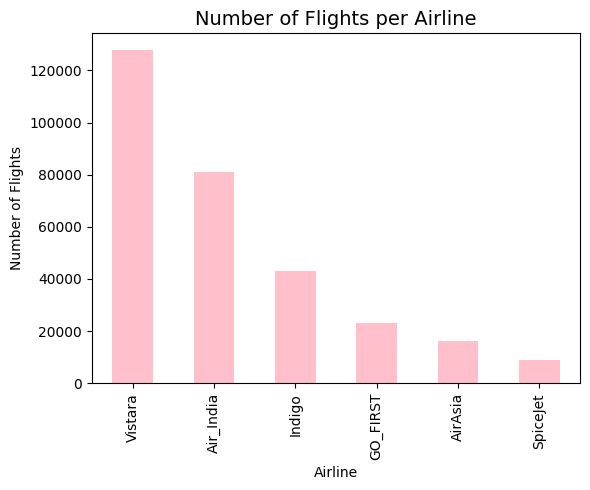

In [13]:
plt.figure(figsize=(6,5))
df['airline'].value_counts().plot(kind='bar', color='pink')
plt.title('Number of Flights per Airline', fontsize=14)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

C:\Users\anusiya\AppData\Local\Temp\ipykernel_10080\1289580956.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='departure_time', y='price', estimator='mean', ci=None, palette='crest')
C:\Users\anusiya\AppData\Local\Temp\ipykernel_10080\1289580956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='departure_time', y='price', estimator='mean', ci=None, palette='crest')


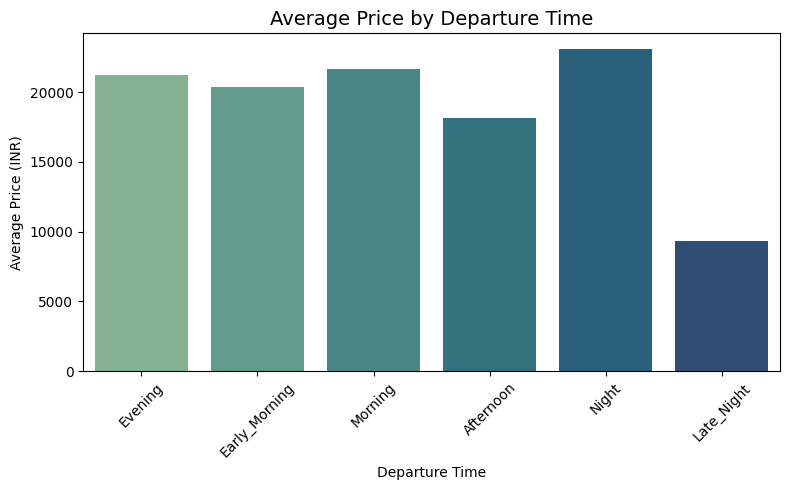

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='departure_time', y='price', estimator='mean', ci=None, palette='crest')
plt.title('Average Price by Departure Time', fontsize=14)
plt.xlabel('Departure Time')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\anusiya\AppData\Local\Temp\ipykernel_10080\4003508867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='stops', y='price', palette='cubehelix')


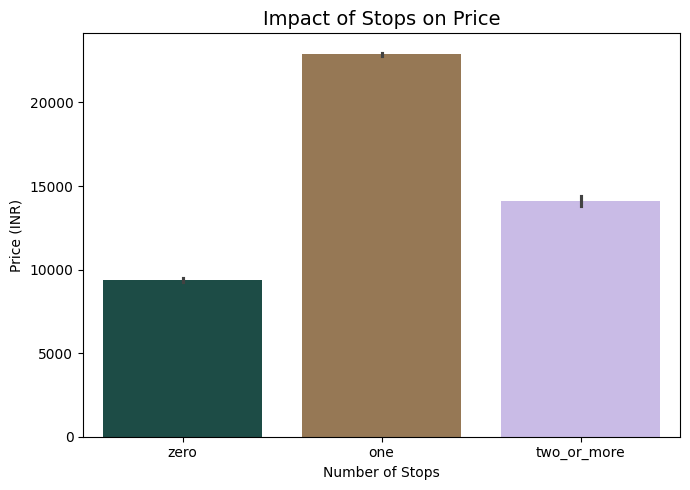

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='stops', y='price', palette='cubehelix')
plt.title('Impact of Stops on Price', fontsize=14)
plt.xlabel('Number of Stops')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()


loading and cleaning sentimental review data

In [16]:
import pandas as pd

sentiment="Indian_Domestic_Airline.csv"
data=pd.read_csv(sentiment)
print(df.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price           route  
0           Mumbai  Economy      2.17          1   5953  Delhi → Mumbai  
1           Mumbai  Economy      2.33          1   5953  Delhi → Mumbai  
2           Mumbai  Economy      2.17          1   5956  Delhi → Mumbai  
3           Mumbai  Economy      2.25          1   5955  Delhi → Mumbai  
4           Mumbai  Economy      2.33          1   5955  Delhi → Mumbai  


In [17]:
print(f"Shape of dataset: {data.shape}")    

Shape of dataset: (2210, 7)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   airline      2210 non-null   object 
 1   Rating - 10  2206 non-null   float64
 2   Title        2210 non-null   object 
 3   Name         2210 non-null   object 
 4   Date         2210 non-null   object 
 5   Review       2210 non-null   object 
 6   Recommond    2210 non-null   object 
dtypes: float64(1), object(6)
memory usage: 121.0+ KB


In [19]:
print("Removing the missing values")
data.dropna(inplace=True)
print(data.isnull().sum())

Removing the missing values
airline        0
Rating - 10    0
Title          0
Name           0
Date           0
Review         0
Recommond      0
dtype: int64


In [20]:
duplicates = data.duplicated().sum()
print(f"\n Number of duplicate rows in dataset: {duplicates}")


 Number of duplicate rows in dataset: 1


In [21]:
data[data.duplicated()]

,airline,Rating - 10,Title,Name,Date,Review,Recommond
1448,IndiGo,8.0,IndiGo customer review,Kumar Ganesh,8th January 2013,DEL-COK-DEL. Excellent flight both flights on ...,yes


In [22]:
data.drop_duplicates(inplace=True)
print("After removing the duplicate row")
print(data.shape)

After removing the duplicate row


(2205, 7)


In [23]:
print("Showing first 5 rows of the dataset:\n")
print(data.head())      

Showing first 5 rows of the dataset:

         airline  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date  \
0                V Bakshi  14th October 2023   
1                 G Oscar  14th October 2023   
2             Rahul Verma  14th October 2023   
3                 G Akron  14th October 2023   
4  Sirajudeen Jawahar ali  14th October 2023   

                                              Review Recommond  
0  ✅ Trip Verified | I had booked this fare at a ...       yes  
1  ✅ Trip Verified | I travel at least four times...        no  
2  ✅ Trip Verified | Taking this opportunity to a...       yes  
3  ✅ Trip Verified | The wor

text preprocessing 

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anusiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anusiya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anusiya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
print("Sample Reviews Before Cleaning:")
print(data['Review'].head())

Sample Reviews Before Cleaning:
0    ✅ Trip Verified | I had booked this fare at a ...
1    ✅ Trip Verified | I travel at least four times...
2    ✅ Trip Verified | Taking this opportunity to a...
3    ✅ Trip Verified | The worst airlines in the hi...
4    ✅ Trip Verified |  Would like to give big thum...
Name: Review, dtype: object


In [26]:
import string

def clean_text(text):
    text = re.sub(r'trip verified', '', text, flags=re.IGNORECASE) 
    text = re.sub(r'✅', '', text) 
    text = text.lower()                                 
    text = re.sub(r'http\S+|www\S+', '', text)        
    text = re.sub(r'\d+', '', text)                     
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub(r'\s+', ' ', text).strip()            
    return text

data['Clean_Review'] = data['Review'].apply(clean_text)

print("Sample Reviews After Cleaning:")
print(data[['Clean_Review']].head()) 

Sample Reviews After Cleaning:
                                        Clean_Review
0  i had booked this fare at a very discounted ra...
1  i travel at least four times a month and air a...
2  taking this opportunity to appreciate and than...
3  the worst airlines in the history of mankind a...
4  would like to give big thumbs up to boarding c...


In [27]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

negation_words = {'no', 'nor', 'not', 'never'}

def preprocess_text(text):
    words = text.split()
    
    words = [word for word in words if (word not in stop_words or word in negation_words)]
 
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

data['Processed_Review'] = data['Clean_Review'].apply(preprocess_text)
print(data[['Processed_Review']].head())
print("Text Preprocessing Completed!\n")


                                    Processed_Review
0  booked fare discounted rate needed travel back...
1  travel least four time month air asia truly ru...
2  taking opportunity appreciate thank entire tea...
3  worst airline history mankind absolutely hate ...
4  would like give big thumb boarding crew m noor...
Text Preprocessing Completed!



In [28]:
print("Unique airline names in flights dataset:")
print(df['airline'].unique())

print("\nUnique airline names in sentiment dataset:")
print(data['airline'].unique())


Unique airline names in flights dataset:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Unique airline names in sentiment dataset:
['AirAsia India' 'AirIndia' 'Air India Express' 'Go First' 'IndiGo'
 'SpiceJet' 'Vistara']


In [29]:
df['airline'] = df['airline'].str.strip().str.lower()
data['airline'] = data['airline'].str.strip().str.lower()


In [30]:
name_map = {
    'airasia india': 'airasia',
    'go first': 'go_first',
    'airindia': 'air_india',
    'air india express': 'air_india'  
}

data['airline'] = data['airline'].replace(name_map)

print("Sentimental review flight names")
print(data['airline'].unique())
print("Recommendation system flight names")
print(df['airline'].unique())


Sentimental review flight names
['airasia' 'air_india' 'go_first' 'indigo' 'spicejet' 'vistara']
Recommendation system flight names
['spicejet' 'airasia' 'vistara' 'go_first' 'indigo' 'air_india']


In [31]:
def label_sentiment(rating):
    if rating >= 8:
        return "Positive"
    elif rating >= 5:
        return "Neutral"
    else:
        return "Negative"

data['sentiment'] = data['Rating - 10'].apply(label_sentiment)
data.head()

,airline,Rating - 10,Title,Name,Date,Review,Recommond,Clean_Review,Processed_Review,sentiment
0,airasia,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes,i had booked this fare at a very discounted ra...,booked fare discounted rate needed travel back...,Neutral
1,airasia,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no,i travel at least four times a month and air a...,travel least four time month air asia truly ru...,Negative
2,airasia,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes,taking this opportunity to appreciate and than...,taking opportunity appreciate thank entire tea...,Positive
3,airasia,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no,the worst airlines in the history of mankind a...,worst airline history mankind absolutely hate ...,Negative
4,airasia,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes,would like to give big thumbs up to boarding c...,would like give big thumb boarding crew m noor...,Positive


implementing models

In [32]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\anusiya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
X = data['Clean_Review']
y = data['sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (1764, 5000)  Test shape: (441, 5000)


to balance dataset

In [35]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print("Data Balanced Successfully!")
print("Class distribution after SMOTE:\n", pd.Series(y_train_balanced).value_counts())


Data Balanced Successfully!
Class distribution after SMOTE:
 sentiment
Positive    1120
Negative    1120
Neutral     1120
Name: count, dtype: int64


Models

In [36]:
print("Training individual models...\n")
label_encoder = LabelEncoder()
y_train_balanced_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

model_lr = LogisticRegression(max_iter=500, random_state=42)
model_nb = MultinomialNB()
model_svm = SVC(probability=True, kernel='linear', random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

classifiers = [
    ('Logistic Regression', model_lr),
    ('Naive Bayes', model_nb),
    ('SVM', model_svm),
    ('Random Forest', model_rf),
    ('XGBoost', model_xgb)
]

performance = {}

for name, model in classifiers:
    model.fit(X_train_balanced, y_train_balanced_encoded)
    y_pred = model.predict(X_test)
    
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
    
    acc = accuracy_score(y_test_decoded, y_pred_decoded)
    f1 = f1_score(y_test_decoded, y_pred_decoded, average='weighted')
    performance[name] = {'Accuracy': acc, 'F1-Score': f1}
    
    print(f"{name} \n Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))


Training individual models...

Logistic Regression 
 Accuracy: 0.8798
Classification Report:
               precision    recall  f1-score   support

    Negative       0.94      0.97      0.96       280
     Neutral       0.40      0.26      0.32        38
    Positive       0.83      0.85      0.84       123

    accuracy                           0.88       441
   macro avg       0.72      0.70      0.71       441
weighted avg       0.86      0.88      0.87       441

Naive Bayes 
 Accuracy: 0.8594
Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.95      0.95       280
     Neutral       0.33      0.45      0.38        38
    Positive       0.86      0.79      0.82       123

    accuracy                           0.86       441
   macro avg       0.72      0.73      0.72       441
weighted avg       0.88      0.86      0.87       441

SVM 
 Accuracy: 0.8844
Classification Report:
               precision    recall  f1-scor

Ensemble model 1

In [37]:
E1_models = [
    ('Naive Bayes', model_nb),
    ('SVM', model_svm),
    ('XGBoost', model_xgb)
]

ensemble1 = VotingClassifier(
    estimators=E1_models,
    voting='soft',
    weights=[3, 3, 3]  
)

ensemble1.fit(X_train_balanced, y_train_balanced_encoded)

y_pred_e1 = ensemble1.predict(X_test)

y_pred_decoded_e1 = label_encoder.inverse_transform(y_pred_e1)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

accuracy_e1 = accuracy_score(y_test_decoded, y_pred_decoded_e1)
f1_e1 = f1_score(y_test_decoded, y_pred_decoded_e1, average='weighted')
performance['Ensemble 1 (MNB+SVM+XGB)'] = {'Accuracy': accuracy_e1, 'F1-Score': f1_e1}

print(f"\n--- Ensemble 1 (MNB + SVM + XGB) ---")
print(f"Accuracy: {accuracy_e1:.4f}")
print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded_e1))



--- Ensemble 1 (MNB + SVM + XGB) ---
Accuracy: 0.8866
Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.99      0.96       280
     Neutral       0.55      0.16      0.24        38
    Positive       0.82      0.87      0.84       123

    accuracy                           0.89       441
   macro avg       0.76      0.67      0.68       441
weighted avg       0.87      0.89      0.87       441



Ensemble model 2

In [38]:
E2_models = [
    ('Logistic Regression', model_lr),
    ('Random Forest', model_rf)
]

ensemble2 = VotingClassifier(
    estimators=E2_models,
    voting='soft',
    weights=[2, 2] 
)

ensemble2.fit(X_train_balanced, y_train_balanced_encoded)

y_pred_e2 = ensemble2.predict(X_test)

y_pred_decoded_e2 = label_encoder.inverse_transform(y_pred_e2)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

accuracy_e2 = accuracy_score(y_test_decoded, y_pred_decoded_e2)
f1_e2 = f1_score(y_test_decoded, y_pred_decoded_e2, average='weighted')
performance['Ensemble 2 (LR+RF)'] = {'Accuracy': accuracy_e2, 'F1-Score': f1_e2}

print(f"\n--- Ensemble 2 (LR + RF) ---")
print(f"Accuracy: {accuracy_e2:.4f}")
print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded_e2))



--- Ensemble 2 (LR + RF) ---
Accuracy: 0.8776
Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.98      0.95       280
     Neutral       0.53      0.21      0.30        38
    Positive       0.81      0.85      0.83       123

    accuracy                           0.88       441
   macro avg       0.76      0.68      0.69       441
weighted avg       0.86      0.88      0.86       441



comparison chart

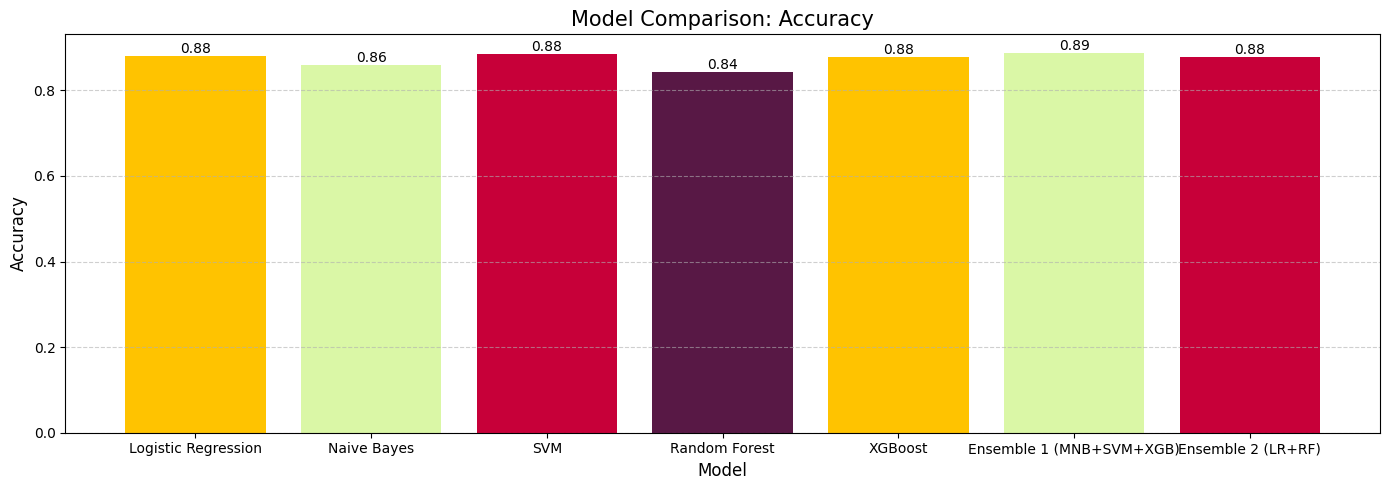

In [39]:
df_performance = pd.DataFrame(performance).T

plt.figure(figsize=(14, 5))
bars = plt.bar(df_performance.index, df_performance['Accuracy'], color=['#FFC300','#DAF7A6','#C70039','#581845'])
plt.title('Model Comparison: Accuracy', fontsize=15)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


sentimental summary

In [40]:
data['Predicted_Sentiment'] = model.predict(X_tfidf)
print(data.Predicted_Sentiment)


0       1
1       0
2       2
3       0
4       2
       ..
2205    2
2206    2
2207    2
2208    2
2209    2
Name: Predicted_Sentiment, Length: 2205, dtype: int64


In [41]:
data['Sentiment_Label'] = label_encoder.inverse_transform(data['Predicted_Sentiment'])
print(data[['Predicted_Sentiment', 'Sentiment_Label']].head())

   Predicted_Sentiment Sentiment_Label
0                    1         Neutral
1                    0        Negative
2                    2        Positive
3                    0        Negative
4                    2        Positive


In [42]:
recommend_df = pd.read_csv("Clean_Dataset.csv")

merged_df = pd.merge(recommend_df, data[['airline', 'Predicted_Sentiment']], on='airline', how='left')

In [43]:
sentiment_summary = data.groupby('airline')['Sentiment_Label'].value_counts(normalize=True).unstack().fillna(0)
sentiment_summary['Positive_Ratio'] = sentiment_summary['Positive']
sentiment_summary = sentiment_summary.sort_values(by='Positive_Ratio', ascending=False)
print(sentiment_summary)


Sentiment_Label  Negative   Neutral  Positive  Positive_Ratio
airline                                                      
vistara          0.311538  0.084615  0.603846        0.603846
indigo           0.459794  0.090722  0.449485        0.449485
airasia          0.650000  0.083333  0.266667        0.266667
spicejet         0.712000  0.046000  0.242000        0.242000
air_india        0.801515  0.068182  0.130303        0.130303
go_first         0.922222  0.038889  0.038889        0.038889


In [44]:
sentiment_feature = sentiment_summary[['Positive_Ratio']].reset_index()
sentiment_feature.rename(columns={'Positive_Ratio': 'airline_quality_score'}, inplace=True)

df = pd.merge(df, sentiment_feature, on='airline', how='left')

print("--- Sentiment Feature Merged ---")
print(df[['airline', 'price', 'airline_quality_score']].head())


--- Sentiment Feature Merged ---
    airline  price  airline_quality_score
0  spicejet   5953               0.242000
1  spicejet   5953               0.242000
2   airasia   5956               0.266667
3   vistara   5955               0.603846
4   vistara   5955               0.603846


In [45]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route,airline_quality_score
0,spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi → Mumbai,0.242000
1,spicejet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi → Mumbai,0.242000
2,airasia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi → Mumbai,0.266667
3,vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi → Mumbai,0.603846
4,vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi → Mumbai,0.603846


recommendation

In [46]:
data.head()

,airline,Rating - 10,Title,Name,Date,Review,Recommond,Clean_Review,Processed_Review,sentiment,Predicted_Sentiment,Sentiment_Label
0,airasia,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes,i had booked this fare at a very discounted ra...,booked fare discounted rate needed travel back...,Neutral,1,Neutral
1,airasia,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no,i travel at least four times a month and air a...,travel least four time month air asia truly ru...,Negative,0,Negative
2,airasia,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes,taking this opportunity to appreciate and than...,taking opportunity appreciate thank entire tea...,Positive,2,Positive
3,airasia,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no,the worst airlines in the history of mankind a...,worst airline history mankind absolutely hate ...,Negative,0,Negative
4,airasia,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes,would like to give big thumbs up to boarding c...,would like give big thumb boarding crew m noor...,Positive,2,Positive


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

try:
    df_raw = pd.read_csv("Clean_Dataset.csv")
    df_raw.drop(columns=['Unnamed: 0', 'flight'], inplace=True, errors='ignore')
except FileNotFoundError:
    print("Error: Clean_Dataset.csv not found. Please ensure it is in the same directory.")
    exit()

STOP_MAP = {'zero': 0, 'one': 1, 'two_or_more': 2.5}

sentiment_data = {
    'airline': ['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Air_India', 'Indigo'],
    'airline_quality_score': [0.25, 0.28, 0.63, 0.03, 0.13, 0.47] 
}
df_sentiment_map = pd.DataFrame(sentiment_data)


def recommend_flights(source, destination, flight_class, days_left, top_n=5, price_weight=0.5, quality_weight=0.4, duration_weight=0.1):
    """
    Hybrid Recommendation Function:
    Ranks flights based on Actual Price, Duration, and Airline Quality Score.
    """
    
    print(f"\n[STEP 1] Filtering Flights Based on Search Criteria...\n")
    
    
    candidates = df_raw[
        (df_raw['source_city'] == source) &
        (df_raw['destination_city'] == destination) &
        (df_raw['class'] == flight_class) &
        (df_raw['days_left'] == days_left)
    ].copy()
    
    if candidates.empty:
        print(f"No flights found for {source} to {destination} on {flight_class} class.")
        return pd.DataFrame()

    print(f"Found {len(candidates)} candidate flights.")
    
    # Hybrid Integration (Quality Score)
    print(f"\n[STEP 2] Merging Airline Quality Score...\n")
    
    # Merge the Sentiment (Quality) Score: This is the HYBRID step!
    candidates = pd.merge(candidates, df_sentiment_map, on='airline', how='left')
    
    # Fill NaN quality scores with the mean if any airline is missing a score
    candidates['airline_quality_score'].fillna(df_sentiment_map['airline_quality_score'].mean(), inplace=True)
    
    print(f"Quality scores integrated.")
    
    # Scoring using ACTUAL PRICE
    print(f"\n[STEP 3] Calculating Hybrid Utility Score using Actual Price...\n")
    
    
    scaler = MinMaxScaler()
    
    candidates['norm_price'] = scaler.fit_transform(candidates[['price']])
    
    candidates['norm_duration'] = scaler.fit_transform(candidates[['duration']])
    
    # Quality score is already 0-1 (Positive_Ratio) and requires no scaling
    candidates['norm_quality'] = candidates['airline_quality_score']
    
    # Utility Score = - (Price_Weight * Price) - (Duration_Weight * Duration) + (Quality_Weight * Quality)
    candidates['utility_score'] = (
        - (candidates['norm_price'] * price_weight)
        - (candidates['norm_duration'] * duration_weight)    
        + (candidates['norm_quality'] * quality_weight)     
    )
    
    print(f"Hybrid scores generated. Ranking flights based on Price, Duration, and Quality.")

    # Final Recommendation
    print(f"\n[STEP 4] Final Recommendation Output...\n")

    # Sort the flights by the Utility Score 
    final_recommendations = candidates.sort_values(by='utility_score', ascending=False)

    # Prepare the final display columns
    display_cols = [
        'airline', 'departure_time', 'arrival_time', 'stops', 'duration', 
        'price', 'airline_quality_score', 'utility_score'
    ]
    
    print(f"Showing Top {top_n} Recommendations:\n")
    return final_recommendations[display_cols].head(top_n)
# Example
recommended_df = recommend_flights(
    source='Delhi', 
    destination='Mumbai', 
    flight_class='Economy', 
    days_left=15
)

if not recommended_df.empty:
    print(recommended_df)


[STEP 1] Filtering Flights Based on Search Criteria...

Found 213 candidate flights.

[STEP 2] Merging Airline Quality Score...

Quality scores integrated.

[STEP 3] Calculating Hybrid Utility Score using Actual Price...

Hybrid scores generated. Ranking flights based on Price, Duration, and Quality.

[STEP 4] Final Recommendation Output...

Showing Top 5 Recommendations:

   airline departure_time   arrival_time stops  duration  price  \
0  Vistara  Early_Morning  Early_Morning  zero      2.17   2476   
1  Vistara          Night          Night  zero      2.17   2476   
2  Vistara        Morning        Morning  zero      2.08   2700   
3  Vistara      Afternoon      Afternoon  zero      2.17   2700   
4  Vistara      Afternoon        Evening  zero      2.17   2700   

   airline_quality_score  utility_score  
0                   0.63       0.249278  
1                   0.63       0.249278  
2                   0.63       0.242524  
3                   0.63       0.242204  
4         